/tmp/ipykernel_45962/3725135232.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


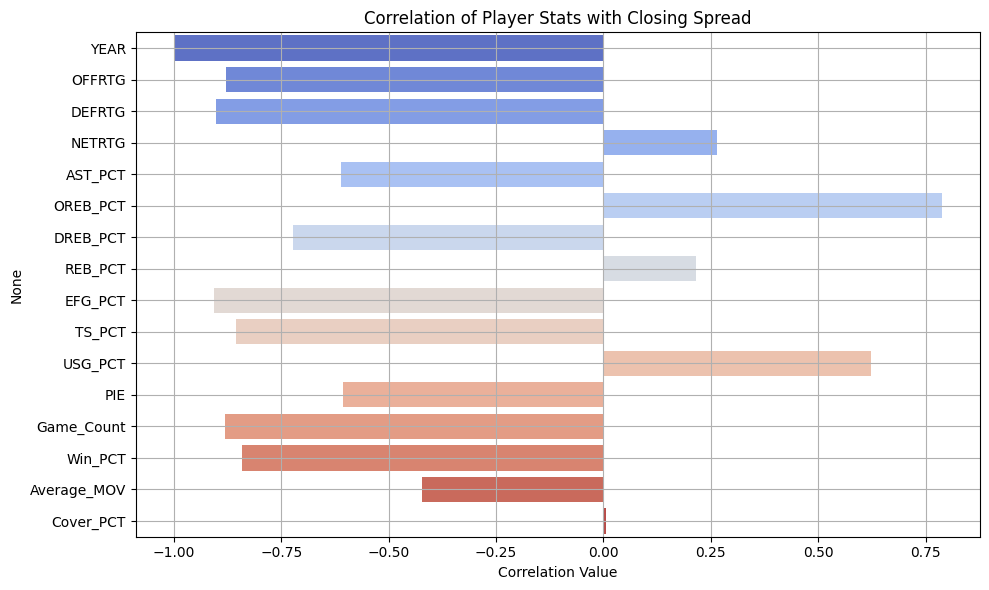

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load player advanced stats
player_df = pd.read_csv('/workspaces/Data-Science-Final-Project/NBA/data/official_player_advanced_stats.csv')
player_df['YEAR'] = player_df['YEAR'].astype(int)

# Load odds/betting data
odds_df = pd.read_csv('/workspaces/Data-Science-Final-Project/NBA/data/all_team_cps_oddh.csv')

# Step 1: Create a YEAR column manually
# Assume odds_df is sorted chronologically by year
years = list(range(2003, 2003 + len(odds_df)))  # Adjust starting year if needed
odds_df['YEAR'] = years

# Step 2: Aggregate player stats by year
player_avg = player_df.groupby('YEAR')[[
    'OFFRTG', 'DEFRTG', 'NETRTG', 'AST_PCT', 'OREB_PCT', 'DREB_PCT',
    'REB_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT', 'PIE'
]].mean().reset_index()

# Step 3: Merge the two on YEAR
merged_df = pd.merge(player_avg, odds_df, on='YEAR', how='inner')

# Step 4: Compute correlations with Closing Spread or Cover_PCT
# (replace with the correct column name from your betting file)
correlations = merged_df.corr(numeric_only=True)['Closing_Spread'].drop('Closing_Spread')

# Step 5: Plot correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlation of Player Stats with Closing Spread')
plt.xlabel('Correlation Value')
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
print("Correlation values with Closing Spread:\n", correlations)


Correlation values with Closing Spread:
 YEAR          -1.000000
OFFRTG        -0.879319
DEFRTG        -0.901484
NETRTG         0.264873
AST_PCT       -0.611897
OREB_PCT       0.787358
DREB_PCT      -0.723638
REB_PCT        0.216446
EFG_PCT       -0.906597
TS_PCT        -0.856119
USG_PCT        0.622598
PIE           -0.606995
Game_Count    -0.882227
Win_PCT       -0.842666
Average_MOV   -0.423394
Cover_PCT      0.004736
Name: Closing_Spread, dtype: float64


Correlation values with Closing Spread:
 YEAR          -1.000000
OFFRTG        -0.879319
DEFRTG        -0.901484
NETRTG         0.264873
AST_PCT       -0.611897
OREB_PCT       0.787358
DREB_PCT      -0.723638
REB_PCT        0.216446
EFG_PCT       -0.906597
TS_PCT        -0.856119
USG_PCT        0.622598
PIE           -0.606995
Game_Count    -0.882227
Win_PCT       -0.842666
Average_MOV   -0.423394
Cover_PCT      0.004736
Name: Closing_Spread, dtype: float64


/tmp/ipykernel_45962/91295235.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


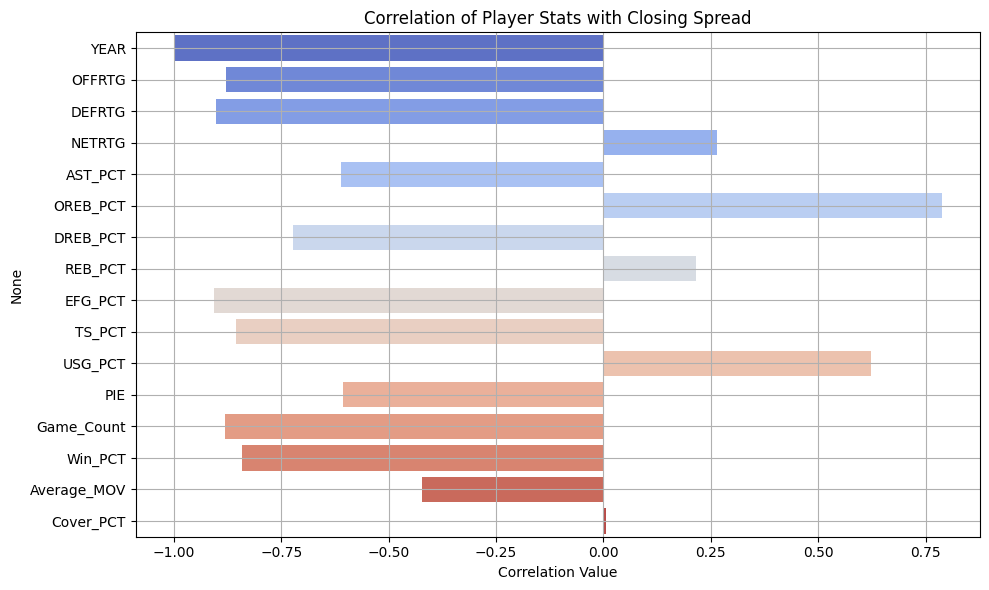

In [9]:

correlations = merged_df.corr(numeric_only=True)['Closing_Spread'].drop('Closing_Spread')
print("Correlation values with Closing Spread:\n", correlations)


plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlation of Player Stats with Closing Spread')
plt.xlabel('Correlation Value')
plt.grid(True)
plt.tight_layout()
plt.show()
